In [2]:
import pandas as pd
dados = {
    'Salários Empresa A': [41, 38, 39, 45, 47, 41, 44, 41, 37, 42],
    'Salários Empresa B': [40, 23, 41, 50, 49, 32, 41, 29, 52, 58]
}

df = pd.DataFrame(dados)

display(df)

amplitudeA = df['Salários Empresa A'].max() - df['Salários Empresa A'].min()
amplitudeB = df['Salários Empresa B'].max() - df['Salários Empresa B'].min()

print(f'Amplitude Empresa A: {amplitudeA} mil dolares')
print(f'Amplitude Empresa B: {amplitudeB} mil dolares')



,Salários Empresa A,Salários Empresa B
0,41,40
1,38,23
2,39,41
3,45,50
4,47,49
5,41,32
6,44,41
7,41,29
8,37,52
9,42,58


Amplitude Empresa A: 10 mil dolares
Amplitude Empresa B: 35 mil dolares


In [3]:
mediaA = df['Salários Empresa A'].mean()
mediaB = df['Salários Empresa B'].mean()

print(f'Média Empresa A: {mediaA} mil dolares')
print(f'Média Empresa B: {mediaB} mil dolares')

medianaA = df['Salários Empresa A'].median()
medianaB = df['Salários Empresa B'].median()

print(f'Mediana Empresa A: {medianaA} mil dolares')
print(f'Mediana Empresa B: {medianaB} mil dolares')

modaA = df['Salários Empresa A'].mode().iloc[0]
modaB = df['Salários Empresa B'].mode().iloc[0]

print(f'Moda Empresa A: {modaA} mil dolares')
print(f'Moda Empresa B: {modaB} mil dolares')


Média Empresa A: 41.5 mil dolares
Média Empresa B: 41.5 mil dolares
Mediana Empresa A: 41.0 mil dolares
Mediana Empresa B: 41.0 mil dolares
Moda Empresa A: 41 mil dolares
Moda Empresa B: 41 mil dolares


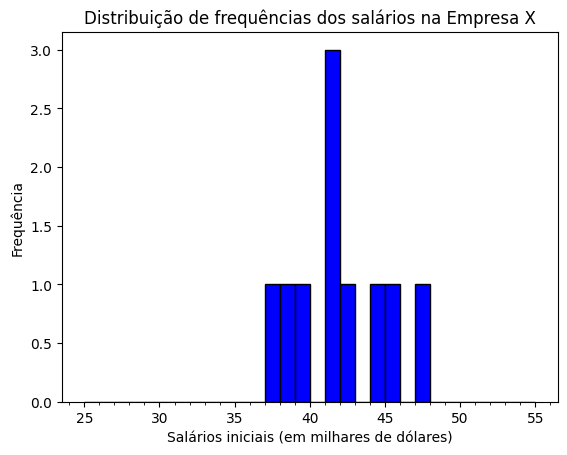

In [4]:
import matplotlib.pyplot as plt

histogramaA = df['Salários Empresa A'].plot.hist(bins = range(25, 56), color= 'blue', edgecolor = 'black' )

histogramaA.set_xlabel('Salários iniciais (em milhares de dólares)')
histogramaA.set_ylabel('Frequência')

histogramaA.set_title('Distribuição de frequências dos salários na Empresa X')
histogramaA.set_xticks(range(25, 56, 5))

histogramaA.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.show()

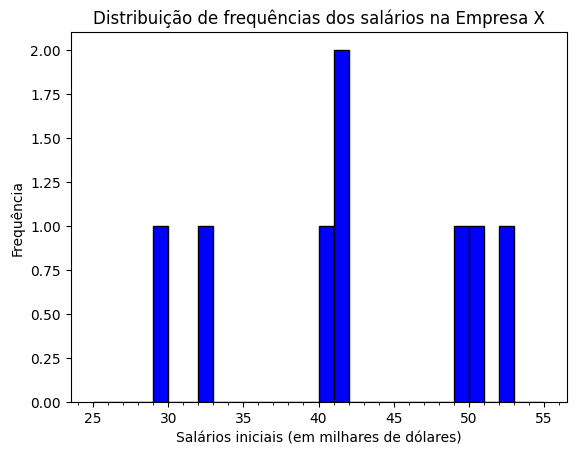

In [5]:
histogramaB = df['Salários Empresa B'].plot.hist(bins = range(25, 56), color= 'blue', edgecolor = 'black' )

histogramaB.set_xlabel('Salários iniciais (em milhares de dólares)')
histogramaB.set_ylabel('Frequência')

histogramaB.set_title('Distribuição de frequências dos salários na Empresa X')
histogramaB.set_xticks(range(25, 56, 5))

histogramaB.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.show()

In [6]:
df_a = df[['Salários Empresa A']].copy()

df_a['Desvios (x-u)'] = df_a["Salários Empresa A"] - mediaA

display(df_a)

soma_xa = df_a["Salários Empresa A"].sum()

desvios_a = df_a["Desvios (x-u)"].sum()

print(f"Total dos salários na Empresa A: {soma_xa:.1f}")
print(f"Tptal dps desvios na Empresa A: {desvios_a:.1f}")




,Salários Empresa A,Desvios (x-u)
0,41,-0.5
1,38,-3.5
2,39,-2.5
3,45,3.5
4,47,5.5
5,41,-0.5
6,44,2.5
7,41,-0.5
8,37,-4.5
9,42,0.5


Total dos salários na Empresa A: 415.0
Tpta; dps desvios na Empresa A: 0.0


In [24]:
df_a['Quadrados (x-u)^2'] = df_a['Desvios (x-u)']**2

variancia_a = df_a['Quadrados (x-u)^2'].sum()/df_a['Salários Empresa A'].count()
variancia_a_2 = df_a["Salários Empresa A"].var(ddof=0)
desvio_padrao_amostral = df_a["Salários Empresa A"].std(ddof=0)

display(df_a)

print(f"A variancia manual: {variancia_a:.1f}")
print(f"A variancia com função: {variancia_a_2:.1f}")
print(f"O desvio padrão amostral: {desvio_padrao_amostral:.1f}")


,Salários Empresa A,Desvios (x-u),Quadrados (x-u)^2
0,41,-0.5,0.25
1,38,-3.5,12.25
2,39,-2.5,6.25
3,45,3.5,12.25
4,47,5.5,30.25
5,41,-0.5,0.25
6,44,2.5,6.25
7,41,-0.5,0.25
8,37,-4.5,20.25
9,42,0.5,0.25


A soma do quadrado das variancias: 8.8
A variancia com função: 8.8
O desvio padrão amostral: 3.0


In [16]:
from scipy.stats import norm

In [18]:
altura_media = 64.2
desvio_padrao = 2.9

x1 = 58.4
x2 = 64.2

area1 = norm.cdf(x1, altura_media, desvio_padrao)
area2 = norm.cdf(x2, altura_media, desvio_padrao)

proporcao = area2 - area1

porcentagem = proporcao * 100

print(f"portcentagem: {porcentagem:.1f}")

portcentagem: 47.7


In [22]:
import numpy as np
import matplotlib as plt
from scipy.stats import norm

x = np.linspace(altura_media - 4*desvio_padrao, altura_media + 4*desvio_padrao, 1000)

y = norm.pdf(x, altura_media, desvio_padrao)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Curva Normal', color='purple')

preenchimento_x = np.linspace(x1, x2, 1000)
preenchimento_y = norm.pdf(preenchimento_x, altura_media, desvio_padrao)

plt.fill_between(preenchimento_x, preenchimento_y, color='deeppurple', alpha=0.5, label="Área entre 59.4 e 64.2 polegadas")

plt.title("Distibuição Normal - Altura de Mulheres")
plt.xlabel("Altura (polegadas)")
plt.ylabel("Densidade de Probabilidade")
plt.axvline(x=altura_media, color='red', linestyle='--', label=f'Média = {altura_media} polegadas')
plt.legend()

plt.grid(True)
plt.show()


TypeError: 'module' object is not callable

In [23]:
# Importa as bibliotecas
import pandas as pd
from math import sqrt

# Dados: frequência de alunos em cada classe
dados = {
    'Nota (Classe)': ['0-2', '3-5', '6-8', '9-11'],
    'f (Núm Alunos)': [4, 9, 12, 5]
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Determinar os pontos médios de cada classe
df['Ponto Médio (x)'] = df['Nota (Classe)'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Cálculo x*f
df['x*f'] = df['Ponto Médio (x)'] * df['f (Núm Alunos)']

# Cálculo do desvio
df['Desvio (x-u)'] = df['Ponto Médio (x)'] - df['x*f'].sum() / df['f (Núm Alunos)'].sum()

# Calcula os quadrados dos desvios parciais
df['Quadrados (x-u)^2'] = df['Desvio (x-u)']**2

# Calcula os quadrados dos desvios parciais vezes a frequência
df['Quadrados (x-u)^2 * f'] = (df['Desvio (x-u)']**2) * df['f (Núm Alunos)']

# Exibir o DataFrame com as classes, frequências e ponto médio
display(df)


# Soma x*f
soma_xf = df['x*f'].sum()

# Soma f (Núm Alunos)
soma_f = df['f (Núm Alunos)'].sum()

# Média
media = df['x*f'].sum() / df['f (Núm Alunos)'].sum()

# Calcular a soma dos quadrados dos desvios vezes a frequência
soma_quad_freq = df['Quadrados (x-u)^2 * f'].sum()

# Calcular o desvio padrão amostral
desvio_padrao_amostral = sqrt( df['Quadrados (x-u)^2 * f'].sum() / (df['f (Núm Alunos)'].sum() - 1) )

# Exibir os resultados
print(f'Soma x*f: {soma_xf:.1f}')
print(f'Soma f (Núm Alunos): {soma_f:.1f}')
print(f'Média: {media:.1f}\n')

print(f'Quadrados (x-u)^2 * f: {soma_quad_freq:.1f}')
print(f'Desvio padrão amostral (s): {desvio_padrao_amostral:.2f}')
print(f'Soma dos quadrados dos desvios vezes a frequência: {soma_quad_freq:.1f}')

,Nota (Classe),f (Núm Alunos),Ponto Médio (x),x*f,Desvio (x-u),Quadrados (x-u)^2,Quadrados (x-u)^2 * f
0,0-2,4,1.0,4.0,-4.8,23.04,92.16
1,3-5,9,4.0,36.0,-1.8,3.24,29.16
2,6-8,12,7.0,84.0,1.2,1.44,17.28
3,9-11,5,10.0,50.0,4.2,17.64,88.20


Soma x*f: 174.0
Soma f (Núm Alunos): 30.0
Média: 5.8

Quadrados (x-u)^2 * f: 226.8
Desvio padrão amostral (s): 2.80
Soma dos quadrados dos desvios vezes a frequência: 226.8
